# I. Modélisation statistique

In [93]:
!pip install s3fs
!pip install pandas
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install matplotlib

## I.1. Chargement et préparation des données

### A) Importation des données

In [94]:
import pandas as pd

# Importation des données avec code_insee en index
donnees = pd.read_csv("bdd_finale.csv", sep=',', encoding='utf-8', index_col=0)
donnees.head()

,beneficiaire_trans_eco,moyenne_conso_agri_hab,moyenne_conso_indus_hab,moyenne_conso_tertiaire_hab,moyenne_conso_residentiel_hab,moyenne_conso_totale_hab,emissions_ges,nb_actes_france_renov,friche,ecoquartiers,...,CSP_maire,com_variation_encours_dette_ha_pct,part_inactifs,part_actifs,dependance_eco,abstention_municipales,taux_creation_ent,total_entreprises,part_licencies_sportifs,part_jeunes_sans_diplome
code_insee,,,,,,,,,,,,,,,,,,,,,
22001,0,2.994071,0.000503,0.631181,3.688905,7.378017,14871,86,2,0,...,12,18.9,12.751678,47.147651,107,17.4,15.0,20,23.825503,9.1
22002,0,1.283886,0.032120,0.173206,3.248865,4.775226,8621,35,0,0,...,54,-39.3,11.062718,50.522648,96,53.8,12.1,33,30.836237,4.0
22003,0,0.000000,0.000000,0.524098,2.908468,3.472740,3028,47,0,0,...,56,99.8,14.239130,48.804348,113,53.7,36.7,30,35.760870,0.0
22004,0,0.200325,0.675332,1.267791,3.034877,5.203150,29130,46,6,0,...,33,-34.1,17.234927,40.540541,126,44.8,12.6,238,24.282744,12.4
22005,0,0.121358,0.082905,1.151104,3.532942,4.926877,4136,10,3,0,...,77,-14.5,14.188533,42.371234,140,22.9,18.8,64,27.891156,2.6


### B) Formatage des données

Nous allons pouvoir observer le type des données que nous avons. Cela va nous permettre de déterminer si on a besoin de modifier certaines variables pour qu'elles soient bien en variables catégorielles. 

In [95]:
donnees.dtypes

beneficiaire_trans_eco                  int64
moyenne_conso_agri_hab                float64
moyenne_conso_indus_hab               float64
moyenne_conso_tertiaire_hab           float64
moyenne_conso_residentiel_hab         float64
moyenne_conso_totale_hab              float64
emissions_ges                           int64
nb_actes_france_renov                   int64
friche                                  int64
ecoquartiers                            int64
part_residences_secondaires           float64
beneficiaire_prog                       int64
climat                                 object
gridens7                                int64
superf_choro                          float64
departement                             int64
gare_tgv                                int64
part_trajets_voiture                  float64
med_disp                                int64
p_pop                                   int64
CSP_maire                               int64
com_variation_encours_dette_ha_pct

In [96]:
# Conversion des variables en variables catégorielles
donnees["beneficiaire_trans_eco"] = donnees["beneficiaire_trans_eco"].astype('category')
donnees["ecoquartiers"] = donnees["ecoquartiers"].astype('category')
donnees["beneficiaire_prog"] = donnees["beneficiaire_prog"].astype('category')
donnees["gridens7"] = donnees["gridens7"].astype('category')
donnees["departement"] = donnees["departement"].astype('category')
donnees["gare_tgv"] = donnees["gare_tgv"].astype('category')
donnees["CSP_maire"] = donnees["CSP_maire"].astype('category')


# Cas de la variable climat 
donnees = pd.get_dummies(donnees, columns = ["climat"]) # On crée des variables binaires pour la variable climat car on a des chaînes de caractères

In [97]:
donnees.dtypes

beneficiaire_trans_eco                category
moyenne_conso_agri_hab                 float64
moyenne_conso_indus_hab                float64
moyenne_conso_tertiaire_hab            float64
moyenne_conso_residentiel_hab          float64
moyenne_conso_totale_hab               float64
emissions_ges                            int64
nb_actes_france_renov                    int64
friche                                   int64
ecoquartiers                          category
part_residences_secondaires            float64
beneficiaire_prog                     category
gridens7                              category
superf_choro                           float64
departement                           category
gare_tgv                              category
part_trajets_voiture                   float64
med_disp                                 int64
p_pop                                    int64
CSP_maire                             category
com_variation_encours_dette_ha_pct     float64
part_inactifs

Nous allons observer si on a des données manquantes dans notre jeu de données.

In [98]:
donnees.isna().sum()

beneficiaire_trans_eco                0
moyenne_conso_agri_hab                0
moyenne_conso_indus_hab               0
moyenne_conso_tertiaire_hab           0
moyenne_conso_residentiel_hab         0
moyenne_conso_totale_hab              0
emissions_ges                         0
nb_actes_france_renov                 0
friche                                0
ecoquartiers                          0
part_residences_secondaires           0
beneficiaire_prog                     0
gridens7                              0
superf_choro                          0
departement                           0
gare_tgv                              0
part_trajets_voiture                  0
med_disp                              0
p_pop                                 0
CSP_maire                             0
com_variation_encours_dette_ha_pct    0
part_inactifs                         0
part_actifs                           0
dependance_eco                        0
abstention_municipales                0


### C) Séparation de la variable à expliquer et des variables explicatives

In [99]:
# Définir X et y pour avoir les variables explicatives et la variable à expliquer beneficiaire_trans_eco
X = donnees.drop(columns=['beneficiaire_trans_eco'])

# Variable à expliquer : beneficiaire_trans_eco
y = donnees["beneficiaire_trans_eco"]

In [100]:
# import numpy as np

# # Convertir les listes en tableaux numpy
# X = np.array(X)
# y = np.array(y)

In [101]:
print("Dimensions de X:", X.shape)
print("Dimensions de y:", y.shape)

Dimensions de X: (1189, 31)
Dimensions de y: (1189,)


In [102]:
import numpy as np

np.unique(y)

array([0, 1], dtype=int64)

## I.2. Modélisation

Nous allons d'abord diviser notre jeu de données en jeux d'apprentissage et de test.

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [104]:
X_train.shape, y_train.shape

((951, 31), (951,))

In [105]:
X_test.shape, y_test.shape

((238, 31), (238,))

## I.2.1. Régression logistique

### A) Construction du modèle

Nous allons maintenant définir notre modèle de régression logistique, sans pénalité.

In [106]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

etapes_reg_log_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('smote', SMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

etapes_reg_log_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables pour ne pas donner plus d'importance à une variable qu'à une autre
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('reg_log', LogisticRegression()), # Régression logistique
        ]

# Création des pipelines
modele_reg_log_smote  = Pipeline(steps=etapes_reg_log__smote) 
modele_reg_log_oversampler  = Pipeline(steps=etapes_reg_log_oversampler) 
modele_reg_log_adasyn  = Pipeline(steps=etapes_reg_log__adasyn)
modele_reg_log_bordeline_smote  = Pipeline(steps=etapes_reg_log_bordeline_smote)

NameError: name 'etapes_reg_log__smote' is not defined

On entraîne le modèle sur les données pour estimer les coefficients. 

In [ ]:
modele_reg_log_smote.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log', LogisticRegression(penalty='none'))])

In [ ]:
modele_reg_log_oversampler.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('reg_log', LogisticRegression(penalty='none'))])

In [ ]:
modele_reg_log_adasyn.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('std_scaler', StandardScaler()), ('adasyn', ADASYN()),
                ('reg_log', LogisticRegression(penalty='none'))])

In [ ]:
modele_reg_log_bordeline_smote.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bordeline_smote', BorderlineSMOTE()),
                ('reg_log', LogisticRegression(penalty='none'))])

On cherche à prédire de nouvelles données grâce aux données test

In [ ]:
y_proba_reg_log_smote = modele_reg_log_smote.predict_proba(X_test)[:,1]
y_pred_reg_log_smote = modele_reg_log_smote.predict(X_test)

In [ ]:
y_proba_reg_log_oversampler = modele_reg_log_oversampler.predict_proba(X_test)[:, 1]
y_pred_reg_log_oversampler = modele_reg_log_oversampler.predict(X_test)

In [ ]:
y_proba_reg_log_adasyn = modele_reg_log_adasyn.predict_proba(X_test)[:, 1]
y_pred_reg_log_adasyn = modele_reg_log_adasyn.predict(X_test)

In [ ]:
y_proba_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_reg_log_bordeline_smote = modele_reg_log_bordeline_smote.predict(X_test)

#### B) Mesure de la performance

Nous allons maintenant évaluer la performance de notre modèle

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score


# Calcul des métriques
auc_roc_reg_log_smote = roc_auc_score(y_test, y_proba_reg_log_smote)
auc_pr_reg_log_smote  = average_precision_score(y_test, y_proba_reg_log_smote)
log_loss_value_reg_log_smote  = log_loss(y_test, y_proba_reg_log_smote)
precision_reg_log_smote  = precision_score(y_test, y_pred_reg_log_smote)
recall_reg_log_smote  = recall_score(y_test, y_pred_reg_log_smote)
f1_reg_log_smote = f1_score(y_test, y_pred_reg_log_smote)
mcc_reg_log_smote  = matthews_corrcoef(y_test, y_pred_reg_log_smote)
balanced_acc_reg_log_smote  = balanced_accuracy_score(y_test, y_pred_reg_log_smote)
specificity_reg_log_smote  = confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_smote)[0, 1])
cohen_kappa_reg_log_smote  = cohen_kappa_score(y_test, y_pred_reg_log_smote)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_smote }")
print(f"AUC-PR: {auc_pr_reg_log_smote }")
print(f"Log Loss: {log_loss_value_reg_log_smote }")
print(f"Precision: {precision_reg_log_smote }")
print(f"Recall: {recall_reg_log_smote }")
print(f"F1 Score: {f1_reg_log_smote }")
print(f"MCC: {mcc_reg_log_smote }")
print(f"Balanced Accuracy: {balanced_acc_reg_log_smote }")
print(f"Specificity: {specificity_reg_log_smote }")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_smote }")

AUC-ROC: 0.6644800777453839
AUC-PR: 0.27803631994162464
Log Loss: 0.6538593084966139
Precision: 0.26804123711340205
Recall: 0.6190476190476191
F1 Score: 0.37410071942446044
MCC: 0.19923098340048567
Balanced Accuracy: 0.6284013605442177
Specificity: 0.6377551020408163
Cohen's Kappa: 0.16956765861875345


In [ ]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_oversampler = roc_auc_score(y_test, y_proba_reg_log_oversampler)
auc_pr_reg_log_oversampler = average_precision_score(y_test, y_proba_reg_log_oversampler)
log_loss_value_reg_log_oversampler = log_loss(y_test, y_proba_reg_log_oversampler)
precision_reg_log_oversampler = precision_score(y_test, y_pred_reg_log_oversampler)
recall_reg_log_oversampler = recall_score(y_test, y_pred_reg_log_oversampler)
f1_reg_log_oversampler = f1_score(y_test, y_pred_reg_log_oversampler)
mcc_reg_log_oversampler = matthews_corrcoef(y_test, y_pred_reg_log_oversampler)
balanced_acc_reg_log_oversampler = balanced_accuracy_score(y_test, y_pred_reg_log_oversampler)
specificity_reg_log_oversampler = confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_oversampler)[0, 1])
cohen_kappa_reg_log_oversampler = cohen_kappa_score(y_test, y_pred_reg_log_oversampler)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_oversampler}")
print(f"AUC-PR: {auc_pr_reg_log_oversampler}")
print(f"Log Loss: {log_loss_value_reg_log_oversampler}")
print(f"Precision: {precision_reg_log_oversampler}")
print(f"Recall: {recall_reg_log_oversampler}")
print(f"F1 Score: {f1_reg_log_oversampler}")
print(f"MCC: {mcc_reg_log_oversampler}")
print(f"Balanced Accuracy: {balanced_acc_reg_log_oversampler}")
print(f"Specificity: {specificity_reg_log_oversampler}")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_oversampler}")

AUC-ROC: 0.6964285714285714
AUC-PR: 0.29842876750985736
Log Loss: 0.6432128853890734
Precision: 0.28735632183908044
Recall: 0.5952380952380952
F1 Score: 0.38759689922480617
MCC: 0.22078578215813224
Balanced Accuracy: 0.6394557823129252
Specificity: 0.6836734693877551
Cohen's Kappa: 0.1962896469180131


In [ ]:
# Calcul des métriques

# Calcul des métriques
auc_roc_reg_log_adasyn = roc_auc_score(y_test, y_proba_reg_log_adasyn)
auc_pr_reg_log_adasyn = average_precision_score(y_test, y_proba_reg_log_adasyn)
log_loss_value_reg_log_adasyn = log_loss(y_test, y_proba_reg_log_adasyn)
precision_reg_log_adasyn = precision_score(y_test, y_pred_reg_log_adasyn)
recall_reg_log_adasyn = recall_score(y_test, y_pred_reg_log_adasyn)
f1_reg_log_adasyn = f1_score(y_test, y_pred_reg_log_adasyn)
mcc_reg_log_adasyn = matthews_corrcoef(y_test, y_pred_reg_log_adasyn)
balanced_acc_reg_log_adasyn = balanced_accuracy_score(y_test, y_pred_reg_log_adasyn)
specificity_reg_log_adasyn = confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_adasyn)[0, 1])
cohen_kappa_reg_log_adasyn = cohen_kappa_score(y_test, y_pred_reg_log_adasyn)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_adasyn}")
print(f"AUC-PR: {auc_pr_reg_log_adasyn}")
print(f"Log Loss: {log_loss_value_reg_log_adasyn}")
print(f"Precision: {precision_reg_log_adasyn}")
print(f"Recall: {recall_reg_log_adasyn}")
print(f"F1 Score: {f1_reg_log_adasyn}")
print(f"MCC: {mcc_reg_log_adasyn}")
print(f"Balanced Accuracy: {balanced_acc_reg_log_adasyn}")
print(f"Specificity: {specificity_reg_log_adasyn}")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_adasyn}")

AUC-ROC: 0.7029883381924198
AUC-PR: 0.3061750916895453
Log Loss: 0.6438078426826673
Precision: 0.3076923076923077
Recall: 0.6666666666666666
F1 Score: 0.42105263157894735
MCC: 0.27082704376225414
Balanced Accuracy: 0.6726190476190477
Specificity: 0.6785714285714286
Cohen's Kappa: 0.23673469387755097


In [ ]:
# Calcul des métriques

auc_roc_reg_log_borderline_smote = roc_auc_score(y_test, y_proba_reg_log_bordeline_smote)
auc_pr_reg_log_borderline_smote = average_precision_score(y_test, y_proba_reg_log_bordeline_smote)
log_loss_value_reg_log_borderline_smote = log_loss(y_test, y_proba_reg_log_bordeline_smote)
precision_reg_log_borderline_smote = precision_score(y_test, y_pred_reg_log_bordeline_smote)
recall_reg_log_borderline_smote = recall_score(y_test, y_pred_reg_log_bordeline_smote)
f1_reg_log_borderline_smote = f1_score(y_test, y_pred_reg_log_bordeline_smote)
mcc_reg_log_borderline_smote = matthews_corrcoef(y_test, y_pred_reg_log_bordeline_smote)
balanced_acc_reg_log_borderline_smote = balanced_accuracy_score(y_test, y_pred_reg_log_bordeline_smote)
specificity_reg_log_borderline_smote = confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_reg_log_bordeline_smote)[0, 1])
cohen_kappa_reg_log_borderline_smote = cohen_kappa_score(y_test, y_pred_reg_log_bordeline_smote)

# Affichage des résultats
print(f"AUC-ROC: {auc_roc_reg_log_borderline_smote}")
print(f"AUC-PR: {auc_pr_reg_log_borderline_smote}")
print(f"Log Loss: {log_loss_value_reg_log_borderline_smote}")
print(f"Precision: {precision_reg_log_borderline_smote}")
print(f"Recall: {recall_reg_log_borderline_smote}")
print(f"F1 Score: {f1_reg_log_borderline_smote}")
print(f"MCC: {mcc_reg_log_borderline_smote}")
print(f"Balanced Accuracy: {balanced_acc_reg_log_borderline_smote}")
print(f"Specificity: {specificity_reg_log_borderline_smote}")
print(f"Cohen's Kappa: {cohen_kappa_reg_log_borderline_smote}")


AUC-ROC: 0.667517006802721
AUC-PR: 0.280109454329479
Log Loss: 0.6451510815406195
Precision: 0.25842696629213485
Recall: 0.5476190476190477
F1 Score: 0.35114503816793896
MCC: 0.16615327365348131
Balanced Accuracy: 0.6054421768707483
Specificity: 0.6632653061224489
Cohen's Kappa: 0.14648552864737152


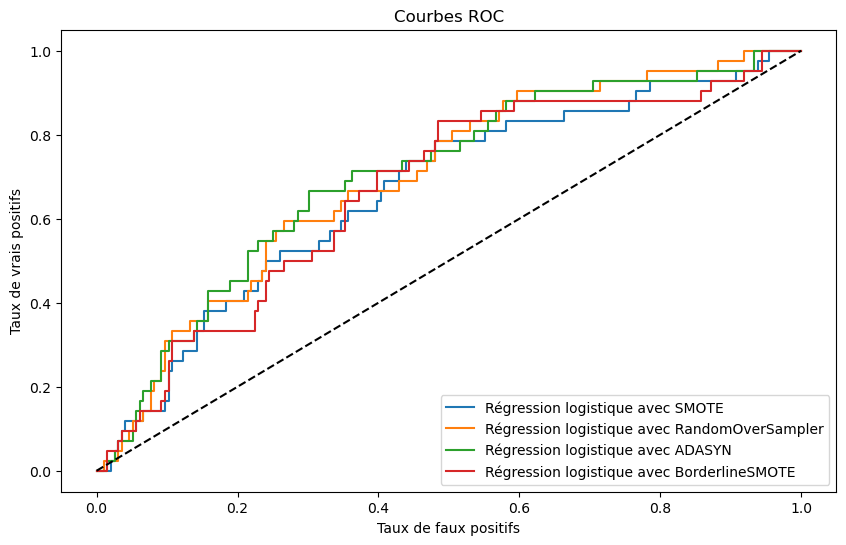

In [ ]:
# Comparaison des courbes ROC

from sklearn.metrics import roc_curve

fpr_reg_log_smote, tpr_reg_log_smote, _ = roc_curve(y_test, y_proba_reg_log_smote)
fpr_reg_log_oversampler, tpr_reg_log_oversampler, _ = roc_curve(y_test, y_proba_reg_log_oversampler)
fpr_reg_log_adasyn, tpr_reg_log_adasyn, _ = roc_curve(y_test, y_proba_reg_log_adasyn)
fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, _ = roc_curve(y_test, y_proba_reg_log_bordeline_smote)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr_reg_log_smote, tpr_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(fpr_reg_log_oversampler, tpr_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(fpr_reg_log_adasyn, tpr_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(fpr_reg_log_bordeline_smote, tpr_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()

plt.show()

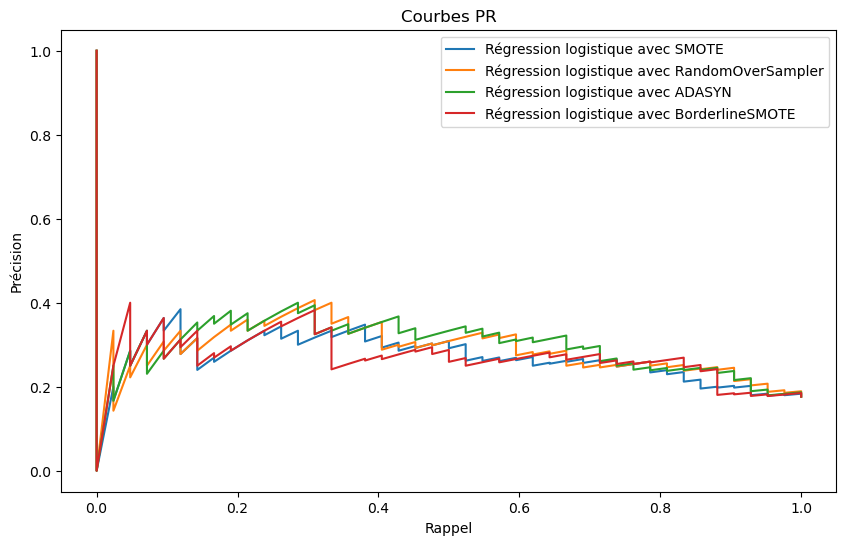

In [ ]:
# Comparaison des courbes PR

from sklearn.metrics import precision_recall_curve

precision_reg_log_smote, recall_reg_log_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_smote)
precision_reg_log_oversampler, recall_reg_log_oversampler, _ = precision_recall_curve(y_test, y_proba_reg_log_oversampler)
precision_reg_log_adasyn, recall_reg_log_adasyn, _ = precision_recall_curve(y_test, y_proba_reg_log_adasyn)
precision_reg_log_bordeline_smote, recall_reg_log_bordeline_smote, _ = precision_recall_curve(y_test, y_proba_reg_log_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(recall_reg_log_smote, precision_reg_log_smote, label='Régression logistique avec SMOTE')
plt.plot(recall_reg_log_oversampler, precision_reg_log_oversampler, label='Régression logistique avec RandomOverSampler')
plt.plot(recall_reg_log_adasyn, precision_reg_log_adasyn, label='Régression logistique avec ADASYN')
plt.plot(recall_reg_log_bordeline_smote, precision_reg_log_bordeline_smote, label='Régression logistique avec BorderlineSMOTE')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbes PR')
plt.legend()
plt.show()

In [ ]:
# Résultats 

resultats = pd.DataFrame({
    "AUC-ROC": [auc_roc_reg_log_smote, auc_roc_reg_log_oversampler, auc_roc_reg_log_adasyn, auc_roc_reg_log_borderline_smote],
    "AUC-PR": [auc_pr_reg_log_smote, auc_pr_reg_log_oversampler, auc_pr_reg_log_adasyn, auc_pr_reg_log_borderline_smote],
    "Log Loss": [log_loss_value_reg_log_smote, log_loss_value_reg_log_oversampler, log_loss_value_reg_log_adasyn, log_loss_value_reg_log_borderline_smote],
   # "Précision": [precision_reg_log_smote, precision_reg_log_oversampler, precision_reg_log_adasyn, precision_reg_log_borderline_smote],
    #"Rappel": [recall_reg_log_smote, recall_reg_log_oversampler, recall_reg_log_adasyn, recall_reg_log_borderline_smote],
    "F1 Score": [f1_reg_log_smote, f1_reg_log_oversampler, f1_reg_log_adasyn, f1_reg_log_borderline_smote],
    "MCC": [mcc_reg_log_smote, mcc_reg_log_oversampler, mcc_reg_log_adasyn, mcc_reg_log_borderline_smote],
    "Accuracy": [balanced_acc_reg_log_smote, balanced_acc_reg_log_oversampler, balanced_acc_reg_log_adasyn, balanced_acc_reg_log_borderline_smote],
    "Spécificité": [specificity_reg_log_smote, specificity_reg_log_oversampler, specificity_reg_log_adasyn, specificity_reg_log_borderline_smote],
    "Kappa de Cohen": [cohen_kappa_reg_log_smote, cohen_kappa_reg_log_oversampler, cohen_kappa_reg_log_adasyn, cohen_kappa_reg_log_borderline_smote]
}, index=["Reg log - SMOTE", "Reg log - RandomOverSampler", "Reg log - ADASYN", "Reg log - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats = resultats.round(3)

resultats

,AUC-ROC,AUC-PR,Log Loss,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Reg log - SMOTE,0.664,0.278,0.654,0.374,0.199,0.628,0.638,0.170
Reg log - RandomOverSampler,0.696,0.298,0.643,0.388,0.221,0.639,0.684,0.196
Reg log - ADASYN,0.703,0.306,0.644,0.421,0.271,0.673,0.679,0.237
Reg log - BorderlineSMOTE,0.668,0.280,0.645,0.351,0.166,0.605,0.663,0.146


#### C) Ajustement des hyperparamètres

Pour la régression logistique, les hyperparamètres les plus courants à optimiser sont :
- C : Ce paramètre de régularisation inverse. Une valeur plus petite indique une régularisation plus forte.
- solver : L'algorithme utilisé pour l'optimisation. Les choix courants sont 'liblinear', 'lbfgs', 'saga', etc.
- penalty : Le type de régularisation à utiliser ('l1', 'l2', 'elasticnet', 'none')
- fonction de lien 

In [ ]:
# Ajustement du modèle

from sklearn.model_selection import GridSearchCV

# Définir les paramètres de la grille
grille_param = {
    'reg_log__C': [0.01, 0.1, 1, 10, 100], # Inverse de la force de régularisation : pas d'utilité pour la régression logistique sans régularisation
    'reg_log__penalty': ['l1', 'l2', 'elasticnet', 'none'], # Type de régularisation
}

# Création du GridSearchCV
grid_search = GridSearchCV(modele_reg_log_adasyn, grille_param, cv=5)

# Entraînement
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'ref_log_max_iter' for estimator Pipeline(steps=[('std_scaler', StandardScaler()), ('adasyn', ADASYN()),
                ('reg_log', LogisticRegression(penalty='none'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
# Meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")

Meilleurs paramètres : {'reg_log__C': 0.01, 'reg_log__penalty': 'l1', 'reg_log__solver': 'liblinear'}


In [ ]:
# Meilleur modèle
best_model_reg_log = grid_search.best_estimator_
best_model_reg_log

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('reg_log',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [ ]:
# Prévisions
y_proba_reg_log_cv = modele_reg_log.predict_proba(X_test)[:, 1]

#### D) Mesure de la performance du modèle optimisé

In [ ]:
auc_roc = roc_auc_score(y_test, y_proba_reg_log_cv)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.6755344995140913


### I.2.2. Abres de décision

#### A) Construction du modèle

In [108]:
# Construction du modèle d'arbres de décision avec rééquilibrage des classes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

etapes_arbre_oversampler = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('oversampler', RandomOverSampler()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_adasyn = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('adasyn', ADASYN()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]

etapes_arbre_bordeline_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('bordeline_smote', BorderlineSMOTE()), # Sur-échantillonnage
        ('arbre', DecisionTreeClassifier()), # Arbre de décision
        ]



modele_arbre_oversampler = Pipeline(steps=etapes_arbre_oversampler) # Création du pipeline
modele_arbre_smote = Pipeline(steps=etapes_arbre_smote) # Création du pipeline
modele_arbre_adasyn = Pipeline(steps=etapes_arbre_adasyn) # Création du pipeline
modele_arbre_bordeline_smote = Pipeline(steps=etapes_arbre_bordeline_smote) # Création du pipeline)

In [109]:
modele_arbre_oversampler.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('oversampler', RandomOverSampler()),
                ('arbre', DecisionTreeClassifier())])

In [110]:
modele_arbre_smote.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('arbre', DecisionTreeClassifier())])

In [111]:
modele_arbre_adasyn.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()), ('adasyn', ADASYN()),
                ('arbre', DecisionTreeClassifier())])

In [112]:
modele_arbre_bordeline_smote.fit(X_train, y_train) # Entraînement

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('bordeline_smote', BorderlineSMOTE()),
                ('arbre', DecisionTreeClassifier())])

In [113]:
# Prédictions

y_proba_arbre_oversampler = modele_arbre_oversampler.predict_proba(X_test)[:, 1]
y_pred_arbre_oversampler = modele_arbre_oversampler.predict(X_test)

y_proba_arbre_smote = modele_arbre_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_smote = modele_arbre_smote.predict(X_test)

y_proba_arbre_adasyn = modele_arbre_adasyn.predict_proba(X_test)[:, 1]
y_pred_arbre_adasyn = modele_arbre_adasyn.predict(X_test)

y_proba_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict_proba(X_test)[:, 1]
y_pred_arbre_bordeline_smote = modele_arbre_bordeline_smote.predict(X_test)

#### B) Mesure de la performance

In [115]:
# Calcul des métriques

from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, cohen_kappa_score

auc_roc_arbre_oversampler = roc_auc_score(y_test, y_proba_arbre_oversampler)
auc_pr_arbre_oversampler = average_precision_score(y_test, y_proba_arbre_oversampler)
log_loss_value_arbre_oversampler = log_loss(y_test, y_proba_arbre_oversampler)
precision_arbre_oversampler = precision_score(y_test, y_pred_arbre_oversampler)
recall_arbre_oversampler = recall_score(y_test, y_pred_arbre_oversampler)
f1_arbre_oversampler = f1_score(y_test, y_pred_arbre_oversampler)
mcc_arbre_oversampler = matthews_corrcoef(y_test, y_pred_arbre_oversampler)
balanced_acc_arbre_oversampler = balanced_accuracy_score(y_test, y_pred_arbre_oversampler)
specificity_arbre_oversampler = confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 0] + confusion_matrix(y_test, y_pred_arbre_oversampler)[0, 1])
cohen_kappa_arbre_oversampler = cohen_kappa_score(y_test, y_pred_arbre_oversampler)

In [116]:
auc_roc_arbre_smote = roc_auc_score(y_test, y_proba_arbre_smote)
auc_pr_arbre_smote = average_precision_score(y_test, y_proba_arbre_smote)
log_loss_value_arbre_smote = log_loss(y_test, y_proba_arbre_smote)
precision_arbre_smote = precision_score(y_test, y_pred_arbre_smote)
recall_arbre_smote = recall_score(y_test, y_pred_arbre_smote)
f1_arbre_smote = f1_score(y_test, y_pred_arbre_smote)
mcc_arbre_smote = matthews_corrcoef(y_test, y_pred_arbre_smote)
balanced_acc_arbre_smote = balanced_accuracy_score(y_test, y_pred_arbre_smote)
specificity_arbre_smote = confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_smote)[0, 1])
cohen_kappa_arbre_smote = cohen_kappa_score(y_test, y_pred_arbre_smote)

In [117]:
auc_roc_arbre_adasyn = roc_auc_score(y_test, y_proba_arbre_adasyn)
auc_pr_arbre_adasyn = average_precision_score(y_test, y_proba_arbre_adasyn)
log_loss_value_arbre_adasyn = log_loss(y_test, y_proba_arbre_adasyn)
precision_arbre_adasyn = precision_score(y_test, y_pred_arbre_adasyn)
recall_arbre_adasyn = recall_score(y_test, y_pred_arbre_adasyn)
f1_arbre_adasyn = f1_score(y_test, y_pred_arbre_adasyn)
mcc_arbre_adasyn = matthews_corrcoef(y_test, y_pred_arbre_adasyn)
balanced_acc_arbre_adasyn = balanced_accuracy_score(y_test, y_pred_arbre_adasyn)
specificity_arbre_adasyn = confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 0] + confusion_matrix(y_test, y_pred_arbre_adasyn)[0, 1])
cohen_kappa_arbre_adasyn = cohen_kappa_score(y_test, y_pred_arbre_adasyn)

In [118]:
auc_roc_arbre_bordeline_smote = roc_auc_score(y_test, y_proba_arbre_bordeline_smote)
auc_pr_arbre_bordeline_smote = average_precision_score(y_test, y_proba_arbre_bordeline_smote)
log_loss_value_arbre_bordeline_smote = log_loss(y_test, y_proba_arbre_bordeline_smote)
precision_arbre_bordeline_smote = precision_score(y_test, y_pred_arbre_bordeline_smote)
recall_arbre_bordeline_smote = recall_score(y_test, y_pred_arbre_bordeline_smote)
f1_arbre_bordeline_smote = f1_score(y_test, y_pred_arbre_bordeline_smote)
mcc_arbre_bordeline_smote = matthews_corrcoef(y_test, y_pred_arbre_bordeline_smote)
balanced_acc_arbre_bordeline_smote = balanced_accuracy_score(y_test, y_pred_arbre_bordeline_smote)
specificity_arbre_bordeline_smote = confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] / (confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 0] + confusion_matrix(y_test, y_pred_arbre_bordeline_smote)[0, 1])
cohen_kappa_arbre_bordeline_smote = cohen_kappa_score(y_test, y_pred_arbre_bordeline_smote)

In [120]:
# Affichage des résultats
resultats = pd.DataFrame({
    "AUC-ROC": [auc_roc_arbre_oversampler, auc_roc_arbre_smote, auc_roc_arbre_adasyn, auc_roc_arbre_bordeline_smote],
    "AUC-PR": [auc_pr_arbre_oversampler, auc_pr_arbre_smote, auc_pr_arbre_adasyn, auc_pr_arbre_bordeline_smote],
    "Log Loss": [log_loss_value_arbre_oversampler, log_loss_value_arbre_smote, log_loss_value_arbre_adasyn, log_loss_value_arbre_bordeline_smote],
    #"Précision": [precision_arbre_oversampler, precision_arbre_smote, precision_arbre_adasyn, precision_arbre_bordeline_smote],
    #"Rappel": [recall_arbre_oversampler, recall_arbre_smote, recall_arbre_adasyn, recall_arbre_bordeline_smote],
    "F1 Score": [f1_arbre_oversampler, f1_arbre_smote, f1_arbre_adasyn, f1_arbre_bordeline_smote],
    "MCC": [mcc_arbre_oversampler, mcc_arbre_smote, mcc_arbre_adasyn, mcc_arbre_bordeline_smote],
    "Accuracy": [balanced_acc_arbre_oversampler, balanced_acc_arbre_smote, balanced_acc_arbre_adasyn, balanced_acc_arbre_bordeline_smote],
    "Spécificité": [specificity_arbre_oversampler, specificity_arbre_smote, specificity_arbre_adasyn, specificity_arbre_bordeline_smote],
    "Kappa de Cohen": [cohen_kappa_arbre_oversampler, cohen_kappa_arbre_smote, cohen_kappa_arbre_adasyn, cohen_kappa_arbre_bordeline_smote]
}, index=["Arbre - RandomOverSampler", "Arbre - SMOTE", "Arbre - ADASYN", "Arbre - BorderlineSMOTE"])

# Arrondir les résultats à 3 chiffres après la virgule
resultats = resultats.round(3)
resultats

,AUC-ROC,AUC-PR,Log Loss,F1 Score,MCC,Accuracy,Spécificité,Kappa de Cohen
Arbre - RandomOverSampler,0.516,0.182,11.510,0.224,0.029,0.516,0.770,0.029
Arbre - SMOTE,0.518,0.182,11.964,0.233,0.031,0.518,0.750,0.030
Arbre - ADASYN,0.517,0.182,10.904,0.217,0.032,0.517,0.796,0.032
Arbre - BorderlineSMOTE,0.543,0.193,10.450,0.258,0.081,0.543,0.801,0.080


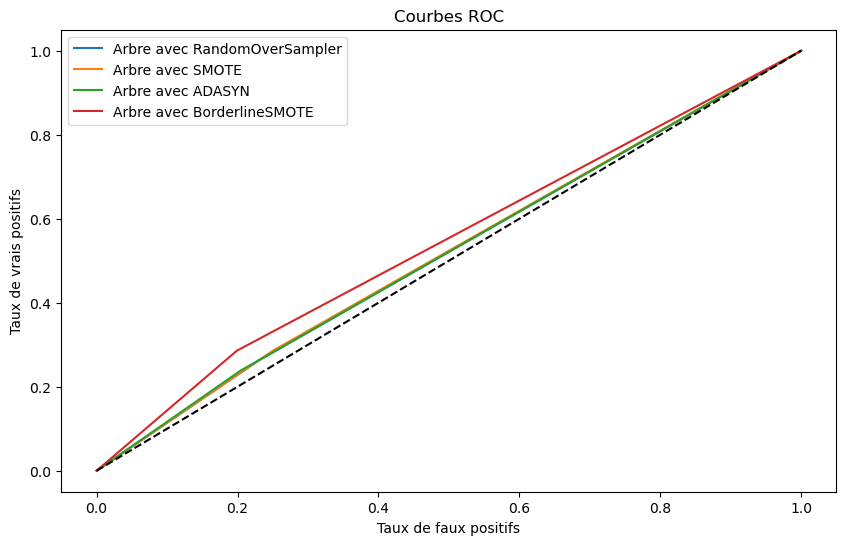

In [121]:
# Tracé des courbes ROC

from sklearn.metrics import roc_curve

fpr_arbre_oversampler, tpr_arbre_oversampler, _ = roc_curve(y_test, y_proba_arbre_oversampler)
fpr_arbre_smote, tpr_arbre_smote, _ = roc_curve(y_test, y_proba_arbre_smote)
fpr_arbre_adasyn, tpr_arbre_adasyn, _ = roc_curve(y_test, y_proba_arbre_adasyn)
fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, _ = roc_curve(y_test, y_proba_arbre_bordeline_smote)

plt.figure(figsize=(10, 6))
plt.plot(fpr_arbre_oversampler, tpr_arbre_oversampler, label='Arbre avec RandomOverSampler')
plt.plot(fpr_arbre_smote, tpr_arbre_smote, label='Arbre avec SMOTE')
plt.plot(fpr_arbre_adasyn, tpr_arbre_adasyn, label='Arbre avec ADASYN')
plt.plot(fpr_arbre_bordeline_smote, tpr_arbre_bordeline_smote, label='Arbre avec BorderlineSMOTE')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend()
plt.show()

#### C) Ajustement des hyperparamètres

In [123]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres pour l'arbre de décision
param_grid = {
    'arbre__criterion': ['gini', 'entropy', 'log_loss'],
    'arbre__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'arbre__min_samples_split': [2, 5, 10, 20,30],
    'arbre__min_samples_leaf': [1, 2, 4]
}

# Choix des métriques adaptées
scoring = {
    'F1': make_scorer(f1_score, average='macro'),
    'Recall': make_scorer(recall_score, average='macro'),
    'AUC': 'roc_auc'
}

In [124]:
pipelines = {
    'oversampler': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('oversampler', RandomOverSampler()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('smote', SMOTE()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'adasyn': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('adasyn', ADASYN()), 
        ('arbre', DecisionTreeClassifier())
    ]),
    'bordeline_smote': Pipeline([
        ('std_scaler', StandardScaler()), 
        ('bordeline_smote', BorderlineSMOTE()), 
        ('arbre', DecisionTreeClassifier())
    ])
}

# Variables pour stocker les meilleurs modèles et scores
best_models = {}
best_scores = {}

# Optimisation et évaluation des pipelines
for name, pipeline in pipelines.items():
    print(f"Optimisation du pipeline: {name}")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    best_scores[name] = grid_search.best_score_
    print(f"Meilleurs paramètres pour {name}:", grid_search.best_params_)
    print(f"Meilleur score pour {name}:", grid_search.best_score_)

# Affichage des performances des modèles optimisés
for name, score in best_scores.items():
    print(f"Score de validation croisée pour {name}: {score}")

# Sélection du meilleur modèle
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

print(f"Le meilleur modèle est {best_model_name} avec un score de {best_scores[best_model_name]}")

Optimisation du pipeline: oversampler
Meilleurs paramètres pour oversampler: {'arbre__criterion': 'log_loss', 'arbre__max_depth': 60, 'arbre__min_samples_leaf': 1, 'arbre__min_samples_split': 5}
Meilleur score pour oversampler: 0.7581592725268669
Optimisation du pipeline: smote


KeyboardInterrupt: 

#### D) Mesure de la performance du modèle optimisé

In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_arbre_cv = confusion_matrix(y_test, y_pred_arbre_cv)
print("La matrice de confusion est : \n", mat_conf_arbre_cv)

La matrice de confusion est : 
 [[130  66]
 [ 23  19]]


Text(0.5, 427.9555555555555, 'valeur prédite')

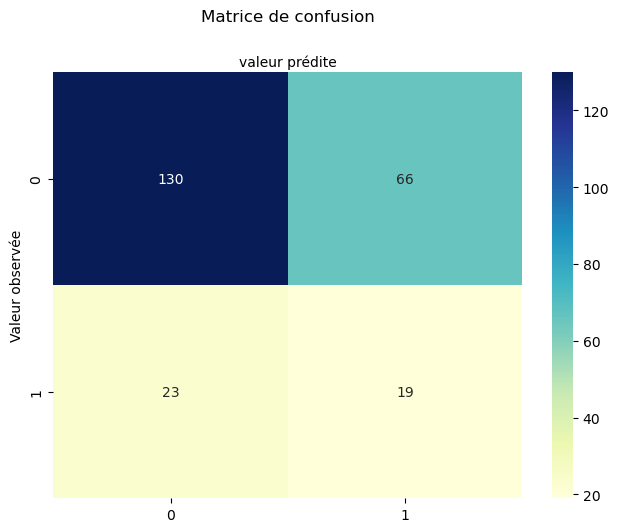

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_arbre_cv), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

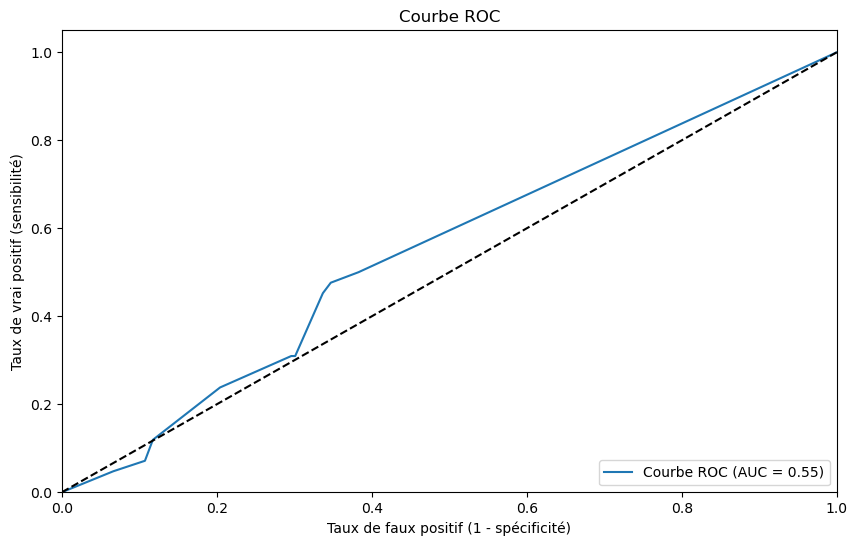

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_arbre_cv = best_modele_arbre.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_arbre_cv) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_arbre_cv = roc_auc_score(y_test, y_pred_arbre_cv)
score_auc_arbre_cv

0.5578231292517006

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_arbre_cv = precision_score(y_test, y_pred_arbre_cv)
print("Precision:", precision_arbre_cv)

Precision: 0.2235294117647059


In [ ]:
from sklearn.metrics import recall_score

recall_arbre_cv = recall_score(y_test, y_pred_arbre_cv)
print("Recall:", recall_arbre_cv)

Recall: 0.4523809523809524


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_arbre_cv = f1_score(y_test, y_pred_arbre_cv)
print("F1-Score:", f1_arbre_cv)

F1-Score: 0.2992125984251968


In [ ]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_arbre_cv) 
print("F1-Score:", f1_arbre_cv)

Modèle de forêts aléatoires 

Score AUC: 0.5578231292517006
F1-Score: 0.2992125984251968


### I.2.3. Forêts Aléatoires 

#### A) Construction du modèle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

etapes = ([
    ("std_scaler", StandardScaler()),
    ("undersampler", RandomOverSampler()),
    ("clf_forets", RandomForestClassifier())
])

etapes_smote = [('std_scaler', StandardScaler()), # Standardisation des variables
        ('smote', SMOTE()), # Sur-échantillonnage
        ('clf_forets', RandomForestClassifier()), # Forets alétaoires 
        ]

model_random_forest = Pipeline(steps=etapes_smote)

model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_forets', RandomForestClassifier())])

In [ ]:
y_pred_random_forest = model_random_forest.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_random_forest = model_random_forest.score(X_test, y_test)
print("Le score du modèle est : ", score_random_forest)

Le score du modèle est :  0.7857142857142857


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_random_forest = confusion_matrix(y_test, y_pred_random_forest
                                          )
print("La matrice de confusion est : \n", mat_conf_random_forest)

La matrice de confusion est : 
 [[175  21]
 [ 30  12]]


Text(0.5, 427.9555555555555, 'valeur prédite')

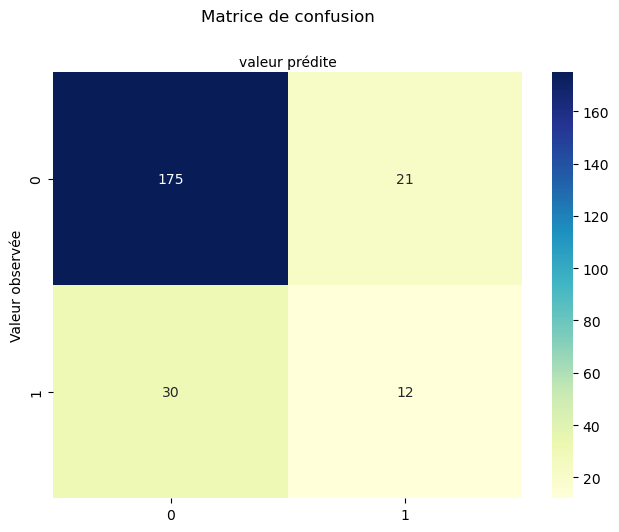

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_random_forest), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

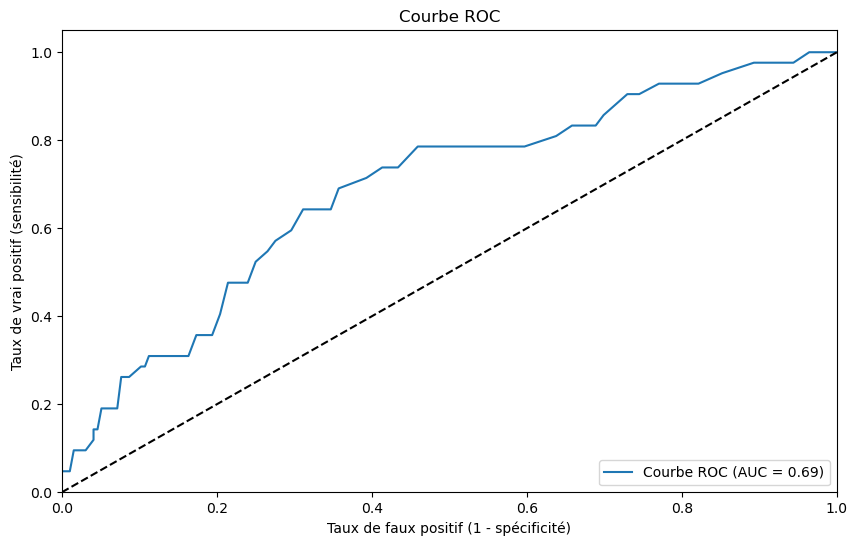

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_random_forest = model_random_forest.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_random_forest) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_random_forest = roc_auc_score(y_test, y_pred_prob_random_forest)
score_auc_random_forest

0.6885325558794947

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_random_forest = precision_score(y_test, y_pred_random_forest)
print("Precision:", precision_random_forest)

Precision: 0.36363636363636365


In [ ]:
from sklearn.metrics import recall_score

recall_random_forest = recall_score(y_test, y_pred_random_forest)
print("Recall:", recall_random_forest)

Recall: 0.2857142857142857


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_random_forest = f1_score(y_test, y_pred_random_forest)
print("F1-Score:", f1_reg_log)

F1-Score: 0.37209302325581395


In [ ]:
# Résumé du modèle de forêts aléatoires

print("Modèle de forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest) 
print("F1-Score:", f1_random_forest)

Modèle de forêts aléatoires 

Score AUC: 0.6885325558794947
F1-Score: 0.32


### I.2.4. Gradient Boosting

#### A) Construction du modèle

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle de gradient boosting
etapes = ([("std_scaler", StandardScaler()),
              ("smote", SMOTE()),
              ("clf_boosting", GradientBoostingClassifier())
    ])

model_gradient_boosting = Pipeline(steps=etapes)

In [ ]:
model_gradient_boosting.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_boosting', GradientBoostingClassifier())])

In [ ]:
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_gradient_boosting = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_gradient_boosting)

Le score du modèle est :  0.6596638655462185


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
print("La matrice de confusion est : \n", mat_conf_gradient_boosting)

La matrice de confusion est : 
 [[170  26]
 [ 32  10]]


Text(0.5, 427.9555555555555, 'valeur prédite')

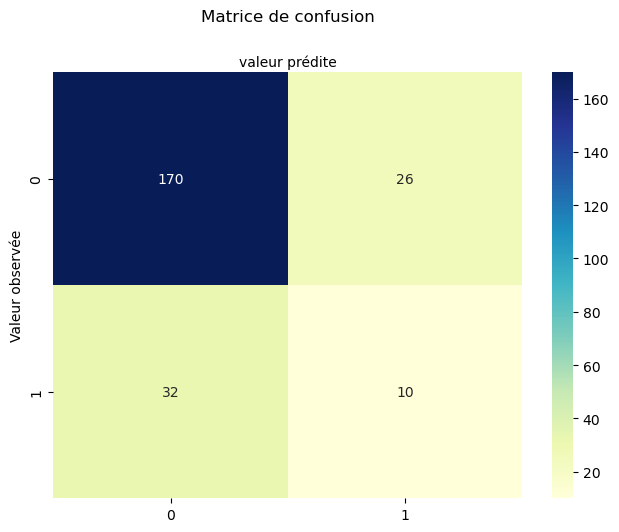

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_gradient_boosting), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

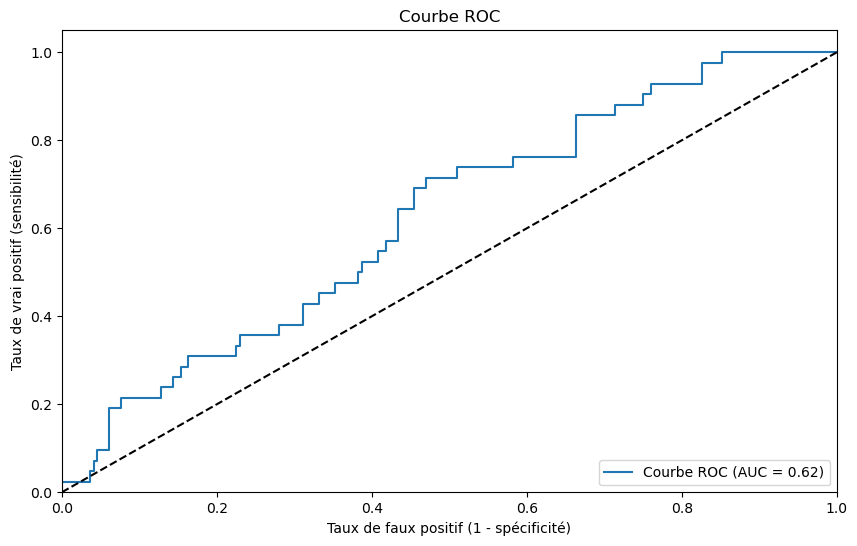

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_gradient_boosting = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gradient_boosting) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_gradient_boosting = roc_auc_score(y_test, y_pred_prob_gradient_boosting)
score_auc_gradient_boosting

0.6232993197278911

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
print("Precision:", precision_gradient_boosting)

Precision: 0.2777777777777778


In [ ]:
from sklearn.metrics import recall_score

recall_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)
print("Recall:", recall_gradient_boosting)

Recall: 0.23809523809523808


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

F1-Score: 0.25641025641025644


In [ ]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting) 
print("F1-Score:", f1_gradient_boosting)

Modèle de gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.25641025641025644


### I.2.5. Régression ridge

#### A) Construction du modèle

In [ ]:
# Régression ridge

from sklearn.linear_model import RidgeClassifier

etapes = ([
    ("std_scaler", StandardScaler()),
    ("smote", SMOTE()),
    ("clf_ridge", RidgeClassifier())
])

model_reg_ridge = Pipeline(steps=etapes)

In [ ]:
model_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('clf_ridge', RidgeClassifier())])

In [ ]:
y_pred_reg_ridge = model_reg_ridge.predict(X_test)

#### B) Mesure de la performance

In [ ]:
score_reg_ridge = modele_reg_log.score(X_test, y_test)
print("Le score du modèle est : ", score_reg_ridge)

Le score du modèle est :  0.6596638655462185


In [ ]:
# Calcul de la matrice de confusion
from sklearn.metrics import confusion_matrix

mat_conf_reg_ridge = confusion_matrix(y_test, y_pred_reg_ridge)
print("La matrice de confusion est : \n", mat_conf_reg_ridge)

La matrice de confusion est : 
 [[134  62]
 [ 17  25]]


Text(0.5, 427.9555555555555, 'valeur prédite')

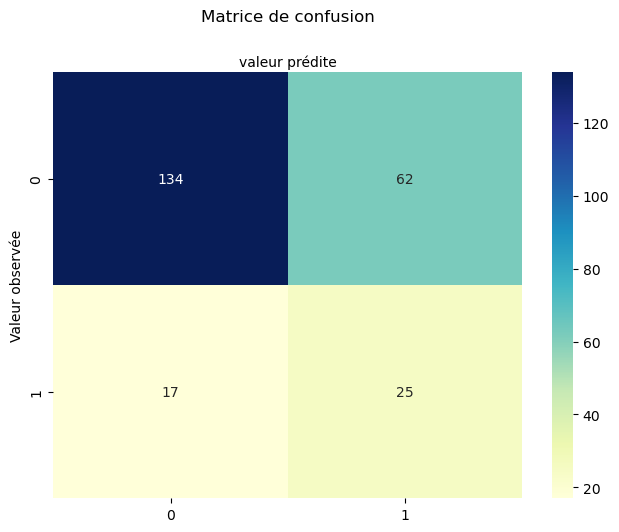

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modalites =[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(modalites))
plt.xticks(tick_marks, modalites)
plt.yticks(tick_marks, modalites)

sns.heatmap(pd.DataFrame(mat_conf_reg_ridge), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('Valeur observée')
plt.xlabel('valeur prédite')

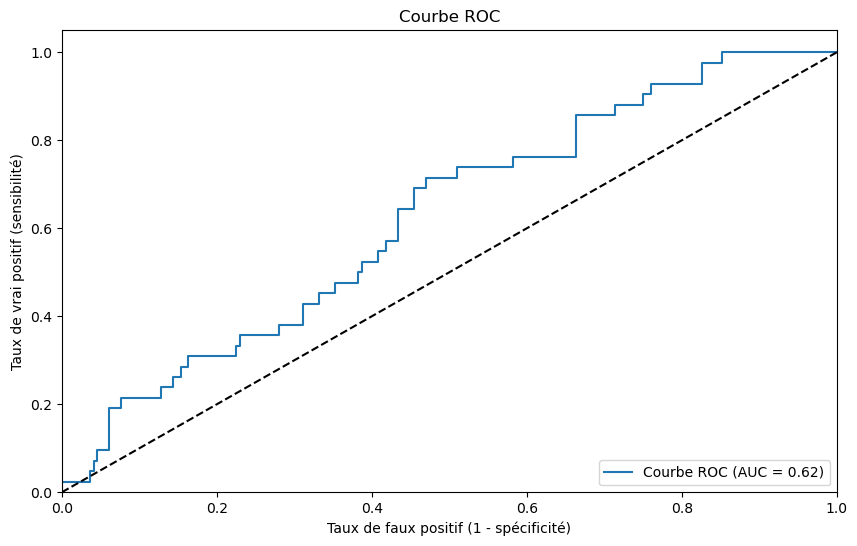

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_reg_ridge = model_gradient_boosting.predict_proba(X_test)[:, 1] # probabilité que la classe soit 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_reg_ridge) # calcul des taux de faux positifs et vrais positifs
roc_auc = auc(fpr, tpr) # calcul de l'aire sous la courbe ROC

# Tracé de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # ligne en pointillés représentant la performance d'un classificateur aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positif (1 - spécificité)")
plt.ylabel('Taux de vrai positif (sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calcul du score AUC

from sklearn.metrics import roc_auc_score

score_auc_reg_ridge = roc_auc_score(y_test, y_pred_prob_reg_ridge)
score_auc_reg_ridge

0.6232993197278911

In [ ]:
# Calcul de la précision

from sklearn.metrics import precision_score

precision_reg_ridge = precision_score(y_test, y_pred_reg_ridge)
print("Precision:", precision_reg_ridge)

Precision: 0.28735632183908044


In [ ]:
from sklearn.metrics import recall_score

recall_reg_ridge = recall_score(y_test, y_pred_reg_ridge)
print("Recall:", recall_reg_ridge)

Recall: 0.5952380952380952


In [ ]:
from sklearn.metrics import f1_score

# Calculate and print F1-score
f1_reg_ridge = f1_score(y_test, y_pred_reg_ridge)
print("F1-Score:", f1_reg_ridge)

F1-Score: 0.38759689922480617


In [ ]:
# Résumé du modèle de gradient boosting

print("Modèle de gradient boosting \n")
print("Score AUC:", score_auc_reg_ridge) 
print("F1-Score:", f1_reg_ridge)

Modèle de gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.38759689922480617


## I.3. Comparaison des modèles

In [ ]:
# Comparaison des modèles

print("Régression logistique \n")
print("Score AUC:", score_auc_reg_log)
print("F1-Score:", f1_reg_log)

print("Forêts aléatoires \n")
print("Score AUC:", score_auc_random_forest)
print("F1-Score:", f1_random_forest)

print("Gradient boosting \n")
print("Score AUC:", score_auc_gradient_boosting)
print("F1-Score:", f1_gradient_boosting)

print("Régression ridge \n")
print("Score AUC:", score_auc_reg_ridge)
print("F1-Score:", f1_reg_ridge)

Régression logistique 

Score AUC: 0.6697035957240038
F1-Score: 0.37209302325581395
Forêts aléatoires 

Score AUC: 0.6885325558794947
F1-Score: 0.32
Gradient boosting 

Score AUC: 0.6232993197278911
F1-Score: 0.25641025641025644
Régression ridge 

Score AUC: 0.6232993197278911
F1-Score: 0.38759689922480617
